In [11]:
# 데이터 분석 패키지
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

#데이터 시각화(추세 등) 패키지
import seaborn as sns

# 가설검정 및 통계분석 패키지
from scipy import stats

# 회귀분석
from statsmodels.formula.api import ols

# ANOVA 분석 패키지
from statsmodels.stats.anova import anova_lm

# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant

# 선형모델 formula
import statsmodels.formula.api as smf

# 평가함수
from statsmodels.tools.eval_measures import rmse

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 학습용/평가용 데이터 분리 : train test
from sklearn.model_selection import train_test_split

# 선형 회귀 모형
from sklearn.linear_model import LinearRegression

# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

#Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

# 평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 예측/회귀
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


# export_graphviz : 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

# graphiz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR

# 로지스틱 회귀
from statsmodels.api import Logit

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# SMOTE
from imblearn.over_sampling import SMOTE

# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier

# 한글 폰트 적용
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [12]:
df_raw = pd.read_csv("D:/data/2/HMEQ.csv",encoding='euc-kr')
df_raw

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,DebtCon,Other,16.0,0,0.0,221.808718,0.0,16,36.112347
3744,0,89000,54576,92937.0,DebtCon,Other,16.0,0,0.0,208.692070,0.0,15,35.859971
3745,0,89200,54045,92924.0,DebtCon,Other,15.0,0,0.0,212.279697,0.0,15,35.556590
3746,0,89800,50370,91861.0,DebtCon,Other,14.0,0,0.0,213.892709,0.0,16,34.340882


In [13]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [14]:
# 데이터 구성하기 - 결측치 처리
df_raw['JOB'].fillna('Other', inplace=True)
df_raw.fillna(df_raw.mean(), inplace=True)

C:\Users\NOH TAEYUN\AppData\Local\Temp\ipykernel_16452\3550870965.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.fillna(df_raw.mean(), inplace=True)


In [15]:
# 데이터 구성하기 - 더미변수 생성
df_dummy = pd.get_dummies(df_raw)
df_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [16]:
# 데이터 구성하기 - 데이터 분할
df_raw_x = df_dummy.drop('BAD',axis=1, inplace=False)
df_raw_y = df_dummy['BAD']
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state=1234)

print(df_train_x.shape)
print(df_train_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(2623, 18)
(2623,)
(1125, 18)
(1125,)


In [17]:
# MLPClassfier 모델 생성 
# - 기본 옵션으로 모델 생성

nn_uncustomized = MLPClassifier(random_state = 1234)
# hidden_layer_sizes = (100,100) 변경 (은닉층 2개, 각 은닉층 노드 100개)
nn_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.722
Accuracy on test set: 0.683


In [18]:
# - 현재 생성된 SVC모델의 옵션 확인
nn_uncustomized

MLPClassifier(random_state=1234)

In [19]:
# test 및 정확도 결과 저장용
train_accuracy = []
test_accuracy = []

# hidden_layer_sizes: 은닉층 변경(20, 40, 60, 80, 100, 120, 140, 160)
para_hidden = [20*hidden for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=v_hidden, random_state=1234) # 1D (20,), (40,)...
    # nn = MLPClassifier(hidden_layer_sizes=(v_hidden, v_hidden), random_state=1234) # 2D (20,20), (40,40)...
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['n_estimators'] = para_hidden
df_accuracy_hidden['TrainScore'] = train_accuracy
df_accuracy_hidden['TestScore'] = test_accuracy
# 은닉층별 정확도 테이블
df_accuracy_hidden.round(3)

,n_estimators,TrainScore,TestScore
0,20,0.906,0.903
1,40,0.886,0.879
2,60,0.865,0.857
3,80,0.909,0.910
4,100,0.722,0.683
5,120,0.907,0.908
6,140,0.213,0.193
7,160,0.905,0.905


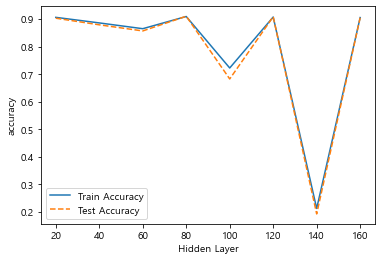

In [20]:
# 모델 정확도별 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden Layer')
plt.legend();

In [21]:
# test 및 정확도 결과 저장용
train_accuracy = []
test_accuracy = []

# activation 변경
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(activation=v_function, random_state=1234) 
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function['n_estimators'] = para_function
df_accuracy_function['TrainScore'] = train_accuracy
df_accuracy_function['TestScore'] = test_accuracy
# Activation별 정확도 테이블
df_accuracy_function.round(3)

,n_estimators,TrainScore,TestScore
0,logistic,0.908,0.908
1,tanh,0.908,0.908
2,relu,0.722,0.683


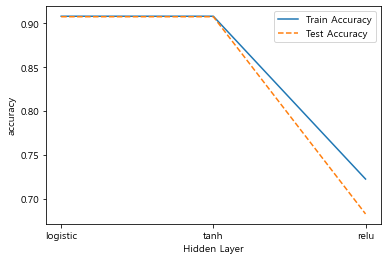

In [22]:
# 모델 정확도별 그래프 확인
plt.plot(para_function, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden Layer')
plt.legend();

In [23]:
#변수명 저장
v_feature_name = df_train_x.columns
#StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

#데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled ,test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("tets data X size : {}".format(df_scaled_train_x.shape))

train data X size : (2623, 18)
tets data X size : (2623, 18)


In [24]:
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.971
Accuracy on test set: 0.943


c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy=[]
#hidden_layer_sizes : 은닉층 변경 (20~240, by 30)
para_hidden = [20*hidden for hidden in range(1, 11)]

for v_hidden in para_hidden:
# nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
  nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state = 1234)
  nn.fit(df_scaled_train_x, df_train_y)
  train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
  test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

#데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarn

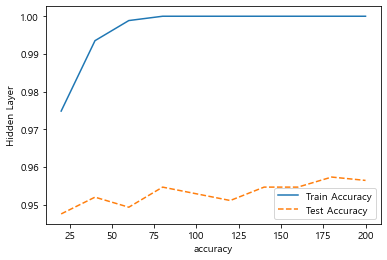

In [26]:
#은닉층별 정확도 테이블
df_accuracy_hidden.round(3)
#모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("accuracy");plt.ylabel("Hidden Layer")
plt.legend()

In [27]:
#은닉층 지정(임의)
hidden_layer_sizes = 80

In [28]:
# Train 및 Test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# activation 변경
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80, 80), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy

c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
# Activation Function별 정확도 테이블
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.937,0.933
1,tanh,0.999,0.952
2,relu,1.000,0.955


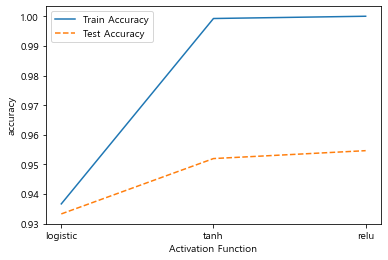

In [30]:
# Activation Function별 정확도 그래프로 확인
plt.plot(para_function, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy') ; plt.xlabel('Activation Function')
plt.legend()

In [31]:
# Activation Function 지정(임의)
activation = 'relu'

In [32]:
# train 및 test 정확도 결과 저장용
train_accuracy = [] ; test_accuracy = []
# solver 변경
para_solver = ['lbfgs', 'sgd', 'adam']

for v_solver in para_solver:
    nn=MLPClassifier(solver=v_solver, activation = 'relu', hidden_layer_sizes = (80, 80), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver['Solver'] = para_solver
df_accuracy_solver['TrainAccuracy'] = train_accuracy
df_accuracy_solver['TestAccuracy'] = test_accuracy

c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
# Solver별 정확도 테이블
df_accuracy_solver.round(3)

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.948
1,sgd,0.934,0.928
2,adam,1.000,0.955


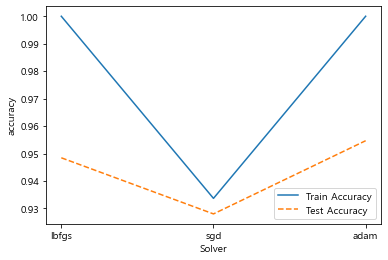

In [34]:
# 정확도 그래프 표현
plt.plot(para_solver, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_solver, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy') ; plt.xlabel('Solver')
plt.legend()

In [35]:
# Solver 지정(임의)
solver = 'adam'

In [36]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# Mini Batch 변경 :
para_batch = [20 * batch for batch in range(1,10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation = "relu",
                      hidden_layer_sizes = (80,80), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


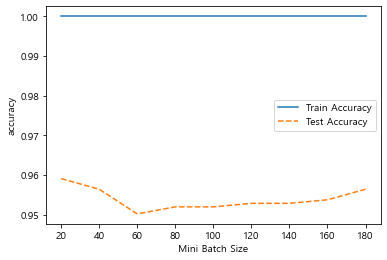

In [37]:
# Mini Batch Size별 정확도 테이블
df_accuracy_batch.round(3)

# 정확도 그래프 표현
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label ="Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Mini Batch Size")
plt.legend()

In [46]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes = (100,100), activation = "relu", solver = "adam",
                        batch_size = 32, random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(nn_final.score(df_scaled_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}". format(confusion_matrix(df_test_y,y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy on training set: 1.000
Accuracy on test set: 0.959

Confusion matrix: 
[[1019    2]
 [  44   60]]
              precision    recall  f1-score   support

           0      0.959     0.998     0.978      1021
           1      0.968     0.577     0.723       104

    accuracy                          0.959      1125
   macro avg      0.963     0.787     0.850      1125
weighted avg      0.959     0.959     0.954      1125

